In [3]:
# Import necessary libraries import pandas as pd import numpy as np
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [6]:
# Load the dataset
# Example: Using a mock dataset with climate data 
data = pd.read_csv('climate_nasa.csv')


In [7]:
print(data.head()) 

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

In [8]:
print(data.describe())

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...


True

In [13]:
data.shape

(522, 5)

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [15]:
data.isnull().sum()


date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

C:\Users\subha\.ipython\nbextensions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


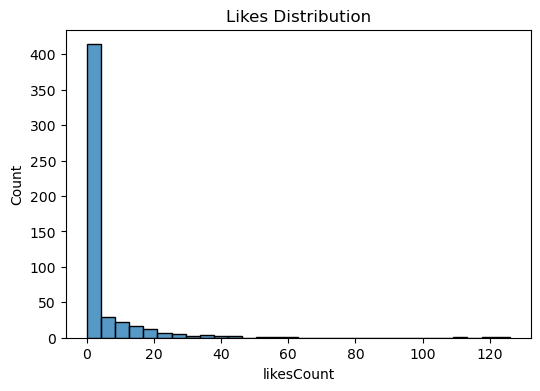

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data['likesCount'], bins=30)
plt.title("Likes Distribution")
plt.show()


C:\Users\subha\.ipython\nbextensions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


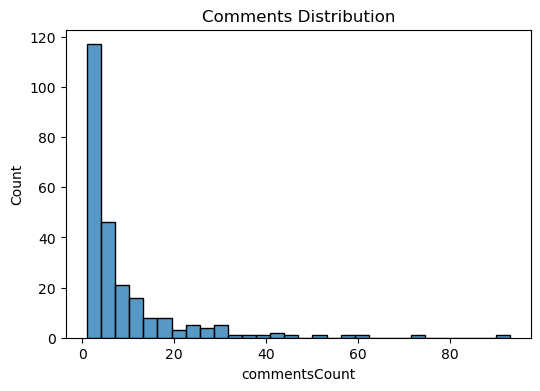

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data['commentsCount'], bins=30)
plt.title("Comments Distribution")
plt.show()

In [20]:
data = data.dropna(subset=['text'])

In [22]:
data['Date'] = pd.to_datetime(data['date'])
data['Year'] = data['Date'].dt.year


C:\Users\subha\AppData\Local\Temp\ipykernel_4332\1463605813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_4332\1463605813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


In [23]:
sia = SentimentIntensityAnalyzer()

data['sentiment_score'] = data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


C:\Users\subha\AppData\Local\Temp\ipykernel_4332\4255133857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [24]:
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['sentiment_score'].apply(get_sentiment)


C:\Users\subha\AppData\Local\Temp\ipykernel_4332\3688021673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['sentiment_score'].apply(get_sentiment)


In [25]:
data[['text', 'sentiment_score', 'Sentiment']].head()

,text,sentiment_score,Sentiment
0,Neat comparison I have not heard it before.\n ...,0.7702,Positive
1,An excellent way to visualise the invisible! T...,0.7840,Positive
2,Does the CO2/ghg in the troposphere affect the...,0.3736,Positive
3,excellent post! I defo feel the difference - o...,0.1759,Positive
4,"Yes, and carbon dioxide does not harm the Eart...",0.6059,Positive


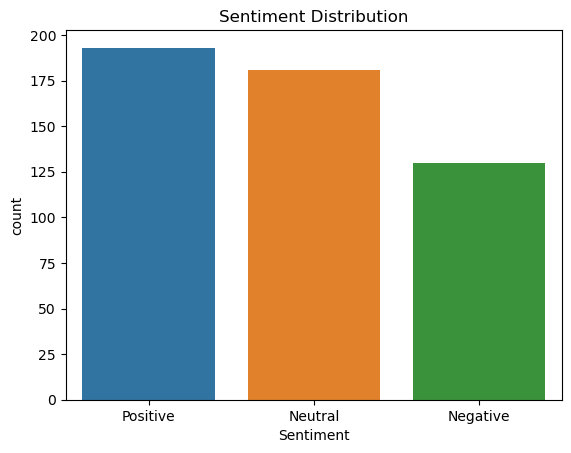

In [26]:
sns.countplot(x='Sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()


In [27]:
X = data['text']
y = data['Sentiment']

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)


In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.75      0.09      0.17        32
     Neutral       0.52      0.77      0.62        35
    Positive       0.53      0.71      0.61        34

    accuracy                           0.53       101
   macro avg       0.60      0.52      0.46       101
weighted avg       0.60      0.53      0.47       101



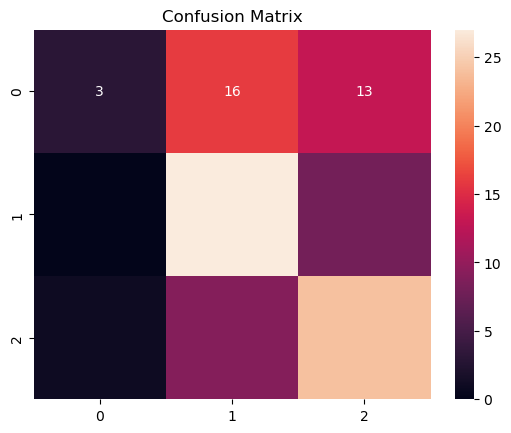

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
